# Interactive PGM Plotting

_Boris Leistedt, October 2016_

In this notebook we will make a simple PGM with `daft`, and then explore the interactive capabilities of the `PGM` class. 

### Requirements

You will need `matplotlib`.

In [1]:
%matplotlib notebook  
import matplotlib.pyplot as plt
from matplotlib import rc

import sys
sys.path.append('../.')
import daft
rc("font", family="serif", size=12)
rc("text", usetex=True)

<IPython.core.display.Javascript object>


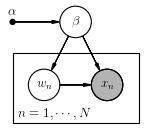

In [2]:
# Instantiate the PGM.
pgm = daft.PGM([2.3, 2.05], origin=[0.3, 0.3])

# Hierarchical parameters.
pgm.add_node(daft.Node("alpha", r"$\alpha$", 0.5, 2, fixed=True))
pgm.add_node(daft.Node("beta", r"$\beta$", 1.5, 2))

# Latent variable.
pgm.add_node(daft.Node("w", r"$w_n$", 1, 1))

# Data.
pgm.add_node(daft.Node("x", r"$x_n$", 2, 1, observed=True))

# Add in the edges.
pgm.add_edge("alpha", "beta")
pgm.add_edge("beta", "w")
pgm.add_edge("w", "x")
pgm.add_edge("beta", "x")

# And a plate.
pgm.add_plate(daft.Plate([0.5, 0.5, 2, 1], label=r"$n = 1, \cdots, N$",
    shift=-0.1))

# Render and save.
pgm.render(interactive=True)

In [4]:
print(pgm)

Node('alpha', r'$\alpha$', 0.5, scale=1.0, 2, observed=False, fixed=True, offset=[0, 6], plot_params={})
Node('beta', r'$\beta$', 1.5, scale=1, 2, observed=False, fixed=False, offset=[0, 0], plot_params={})
Node('w', r'$w_n$', 1, scale=1, 1, observed=False, fixed=False, offset=[0, 0], plot_params={})
Node('x', r'$x_n$', 2, scale=1, 1, observed=True, fixed=False, offset=[0, 0], plot_params={})
Plate([0.5, 0.5, 2, 1], label=r'$n = 1, \cdots, N$', position='bottom left', label_offset=[5, 5], shift=-0.1, rect_params={'lw': 1, 'fc': 'none', 'ec': 'k'}, bbox={})



In [5]:
pgm.figure.savefig("classic.pdf")
pgm.figure.savefig("classic.png", dpi=250)